In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from IPython.display import Image
from imutils import paths
import numpy as np
import cv2
import os

In [2]:
def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [3]:
imagePaths = sorted(list(paths.list_images('train')))
data = []
labels = []

for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath, 1)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
    hist = extract_histogram(image)
    data.append(hist)
    labels.append(label)

0


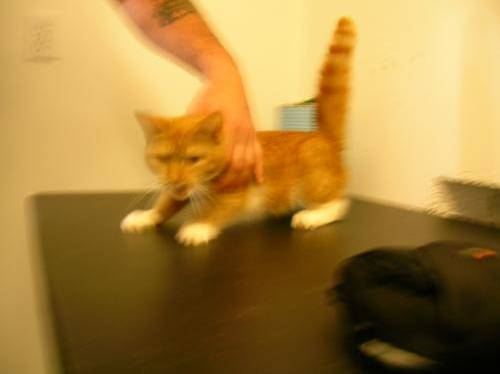

In [4]:
le = LabelEncoder()
labels = le.fit_transform(labels)
print(labels[0])
Image(filename=imagePaths[0])

In [5]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(data), labels, test_size=0.25, random_state=5)

In [6]:
model = LinearSVC(random_state = 5, C = 0.72)
model.fit(trainData, trainLabels)

LinearSVC(C=0.72, random_state=5)

In [7]:
predictions = model.predict(testData)
print(classification_report(testLabels, predictions, target_names=le.classes_))

              precision    recall  f1-score   support

         cat       0.51      0.70      0.59       115
         dog       0.63      0.44      0.52       135

    accuracy                           0.56       250
   macro avg       0.57      0.57      0.55       250
weighted avg       0.57      0.56      0.55       250



In [8]:
from sklearn.metrics import f1_score
predictions = model.predict(testData)
f1_score(testLabels, predictions, average='macro')

0.5528448734269003

In [21]:
model.coef_[0][75]

0.3616986770050227

In [19]:
len(model.coef_[0])

512

In [38]:
st = 'test\cat.1032.jpg'

In [39]:
singleImage = cv2.imread(st,1)
histt = extract_histogram(singleImage)
histt2 = histt.reshape(1, -1)
prediction = model.predict(histt2)

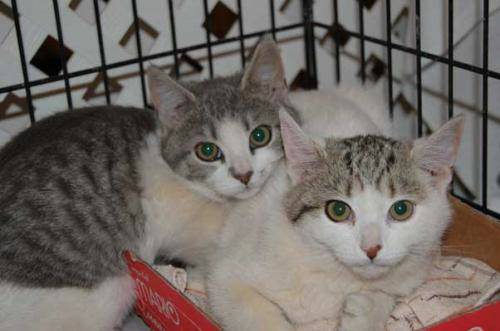

In [40]:
Image(filename=st)

In [41]:
prediction

array([0], dtype=int64)